In [234]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Parâmetros de configuração
num_interacoes = 20
num_ligacoes = 5

# Definir timestamps de início e fim da chamada
inicio_chamada = datetime(2023, 7, 12, 9, 0)
fim_chamada = datetime(2023, 7, 12, 10, 0)

# Gerar IDs de ligação
ids_ligacao = list(range(1, num_ligacoes + 1))

# Criar DataFrame de interações
df = pd.DataFrame(columns=['id_ligacao', 'falante', 'tempo_inicio', 'tempo_fim'])

for id_ligacao in ids_ligacao:
    # Gerar timestamps aleatórios dentro do intervalo da chamada
    timestamps = []
    for _ in range(num_interacoes):
        random_time = inicio_chamada + timedelta(seconds=random.randint(0, int((fim_chamada - inicio_chamada).total_seconds())))
        timestamps.append(random_time)

    # Selecionar apenas 5 timestamps aleatórios
    random_timestamps = random.sample(timestamps, num_interacoes // 2 * 2)

    # Criar dados para a ligação atual
    data = {
        'id_ligacao': [id_ligacao] * num_interacoes,
        'falante': ['Atendente', 'Cliente'] * (num_interacoes // 2),
        'tempo_inicio': random_timestamps,
        'tempo_fim': random_timestamps[1:] + [fim_chamada],
    }

    # Adicionar os dados ao DataFrame principal
    df = df.append(pd.DataFrame(data), ignore_index=True)

# Ordenar o DataFrame pelo ID da ligação
df = df.sort_values('id_ligacao')

# Reiniciar o índice
df = df.reset_index(drop=True)

# Exibição do DataFrame ordenado
print(df)


   id_ligacao    falante        tempo_inicio           tempo_fim
0           1  Atendente 2023-07-12 09:25:25 2023-07-12 09:50:43
1           1    Cliente 2023-07-12 09:09:51 2023-07-12 10:00:00
2           1  Atendente 2023-07-12 09:43:47 2023-07-12 09:09:51
3           1    Cliente 2023-07-12 09:27:22 2023-07-12 09:43:47
4           1  Atendente 2023-07-12 09:48:57 2023-07-12 09:27:22
..        ...        ...                 ...                 ...
95          5    Cliente 2023-07-12 09:20:42 2023-07-12 09:46:29
96          5  Atendente 2023-07-12 09:17:18 2023-07-12 09:20:42
97          5  Atendente 2023-07-12 09:21:40 2023-07-12 09:00:44
98          5  Atendente 2023-07-12 09:29:50 2023-07-12 09:20:46
99          5    Cliente 2023-07-12 09:00:44 2023-07-12 10:00:00

[100 rows x 4 columns]


/tmp/ipykernel_115/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_115/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_115/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_115/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_115/1393994421.py:38: FutureWarning: The frame.append method is deprecated and wi

In [235]:
import pandas as pd

# Obter as informações dos índices específicos
index_1 = 1
index_2 = 2

# Obter os tempos de início e fim dos índices específicos
tempo_inicio_1 = df.loc[index_1, 'tempo_inicio']
tempo_fim_1 = df.loc[index_1, 'tempo_fim']
tempo_inicio_2 = df.loc[index_2, 'tempo_inicio']
tempo_fim_2 = df.loc[index_2, 'tempo_fim']

# Calcular o tempo de espera entre os índices
tempo_espera = tempo_inicio_2 - tempo_fim_1

# Exibir o resultado
print(f"Tempo de espera entre os índices {index_1} e {index_2}: {tempo_espera}")


Tempo de espera entre os índices 1 e 2: -1 days +23:43:47


In [236]:
def calcular_tempo_espera(df):
    df['tempo_espera'] = (df['tempo_inicio'].shift(-1) - df['tempo_fim']).dt.total_seconds()

    # Calcular o tempo total de espera para a mesma ligação
    tempo_total_espera = df['tempo_espera'].sum()

    # Calcular o percentual de espera em relação ao tempo total de espera
    df['percentual_espera'] = (df['tempo_espera'] / tempo_total_espera) * 100
    df['percentual_espera'] = df['percentual_espera'].abs()

    return df


In [237]:
df = calcular_tempo_espera(df)

In [238]:
 df.loc[(df.id_ligacao == 1)] 

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,percentual_espera
0,1,Atendente,2023-07-12 09:25:25,2023-07-12 09:50:43,-2452.0,35.270426
1,1,Cliente,2023-07-12 09:09:51,2023-07-12 10:00:00,-973.0,13.995972
2,1,Atendente,2023-07-12 09:43:47,2023-07-12 09:09:51,1051.0,15.117952
3,1,Cliente,2023-07-12 09:27:22,2023-07-12 09:43:47,310.0,4.459148
4,1,Atendente,2023-07-12 09:48:57,2023-07-12 09:27:22,1687.0,24.266398
5,1,Cliente,2023-07-12 09:55:29,2023-07-12 09:48:57,-39.0,0.560990
6,1,Cliente,2023-07-12 09:48:18,2023-07-12 09:16:55,-110.0,1.582278
7,1,Atendente,2023-07-12 09:15:05,2023-07-12 09:48:18,-926.0,13.319908
8,1,Cliente,2023-07-12 09:32:52,2023-07-12 09:15:05,-329.0,4.732451
9,1,Atendente,2023-07-12 09:09:36,2023-07-12 09:32:52,-957.0,13.765823


In [239]:
 df.loc[(df.id_ligacao == 2)] 

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,percentual_espera
20,2,Atendente,2023-07-12 09:40:15,2023-07-12 09:14:44,0.0,0.000000
21,2,Cliente,2023-07-12 09:14:44,2023-07-12 09:37:02,0.0,0.000000
22,2,Atendente,2023-07-12 09:37:02,2023-07-12 09:44:22,0.0,0.000000
23,2,Cliente,2023-07-12 09:44:22,2023-07-12 09:31:30,-1531.0,22.022440
24,2,Cliente,2023-07-12 09:05:59,2023-07-12 10:00:00,-2889.0,41.556387
25,2,Cliente,2023-07-12 09:11:51,2023-07-12 09:15:47,0.0,0.000000
26,2,Atendente,2023-07-12 09:15:47,2023-07-12 09:05:59,76.0,1.093211
27,2,Cliente,2023-07-12 09:07:15,2023-07-12 09:40:15,-525.0,7.551784
28,2,Atendente,2023-07-12 09:31:30,2023-07-12 09:11:51,-617.0,8.875144
29,2,Atendente,2023-07-12 09:01:34,2023-07-12 09:07:15,2820.0,40.563867


In [240]:
# Criar tabela final sem os valores NaN
df_final_dropna = df.dropna().reset_index(drop=True)

# Exibir a tabela final sem os valores NaN
print(df_final_dropna)

   id_ligacao    falante        tempo_inicio           tempo_fim  \
0           1  Atendente 2023-07-12 09:25:25 2023-07-12 09:50:43   
1           1    Cliente 2023-07-12 09:09:51 2023-07-12 10:00:00   
2           1  Atendente 2023-07-12 09:43:47 2023-07-12 09:09:51   
3           1    Cliente 2023-07-12 09:27:22 2023-07-12 09:43:47   
4           1  Atendente 2023-07-12 09:48:57 2023-07-12 09:27:22   
..        ...        ...                 ...                 ...   
94          5  Atendente 2023-07-12 09:46:29 2023-07-12 09:40:17   
95          5    Cliente 2023-07-12 09:20:42 2023-07-12 09:46:29   
96          5  Atendente 2023-07-12 09:17:18 2023-07-12 09:20:42   
97          5  Atendente 2023-07-12 09:21:40 2023-07-12 09:00:44   
98          5  Atendente 2023-07-12 09:29:50 2023-07-12 09:20:46   

    tempo_espera  percentual_espera  
0        -2452.0          35.270426  
1         -973.0          13.995972  
2         1051.0          15.117952  
3          310.0           4.45

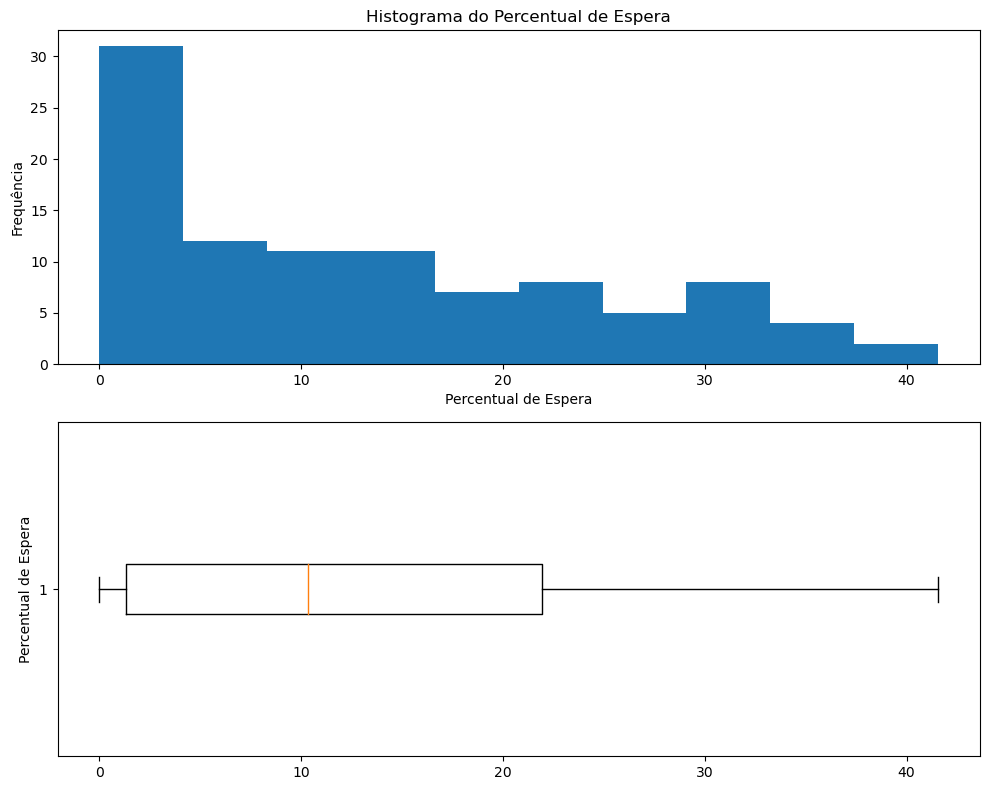

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura e eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axs[0].hist(df_final_dropna['percentual_espera'], bins=10)
axs[0].set_xlabel('Percentual de Espera')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma do Percentual de Espera')

# Boxplot horizontal
axs[1].boxplot(df_final_dropna['percentual_espera'], vert=False)
axs[1].set_ylabel('Percentual de Espera')
axs[1].set_xlabel('')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


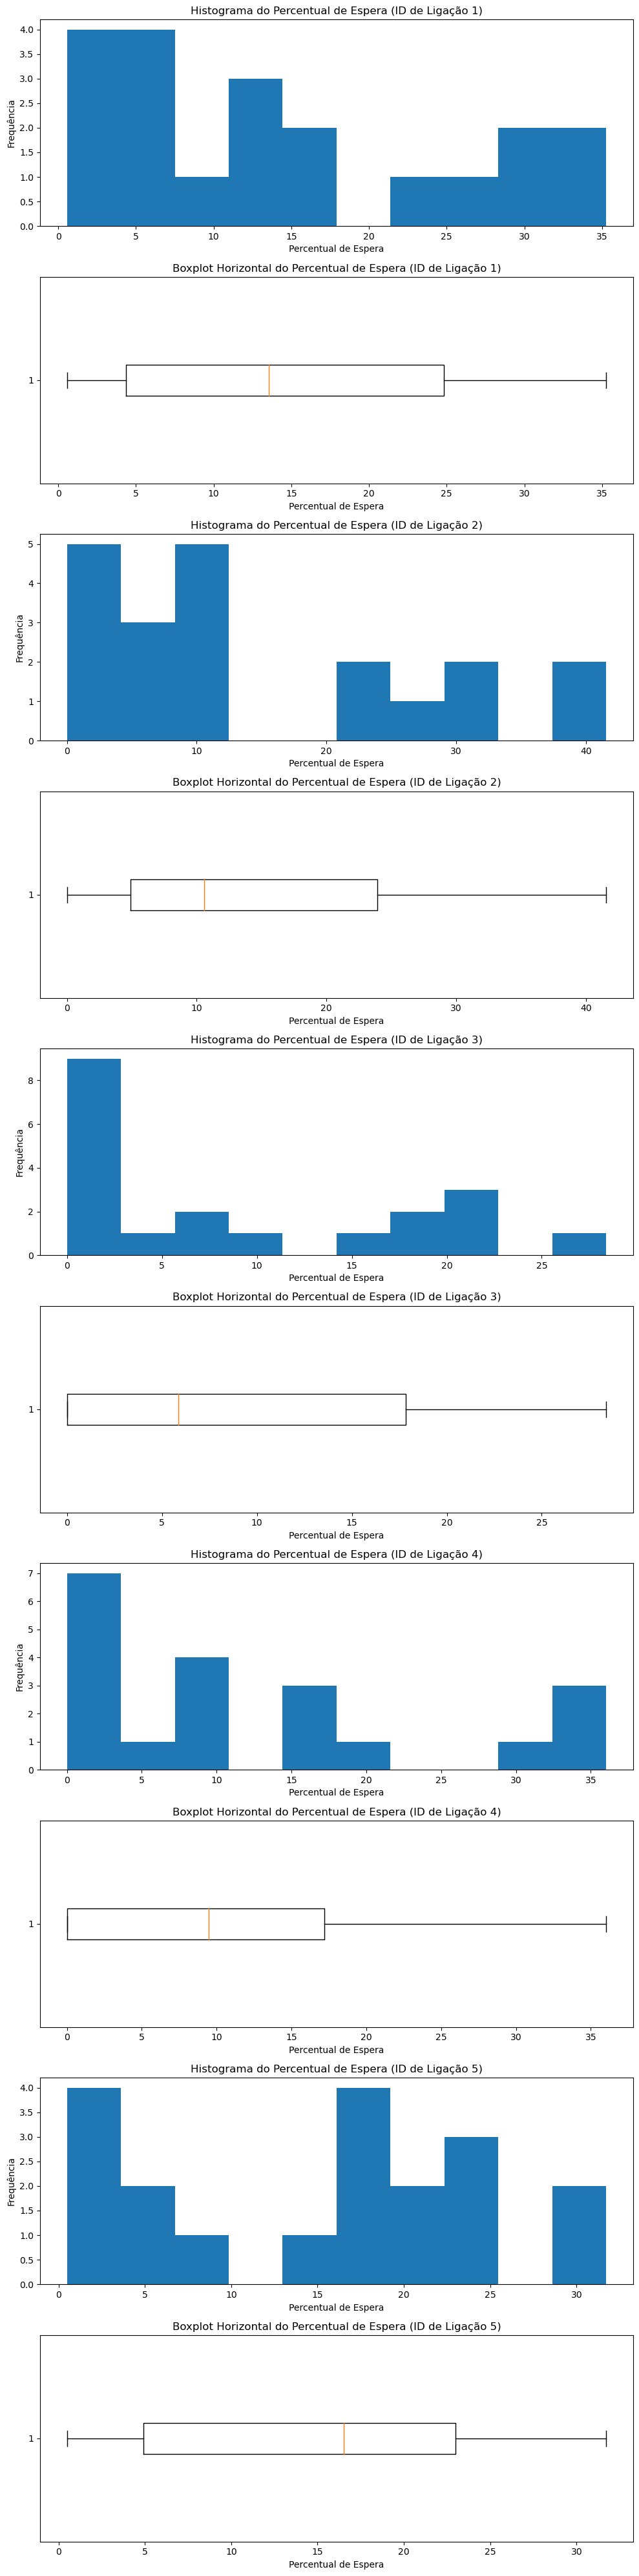

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a lista de IDs de ligação únicos
ids_ligacao = df_final_dropna['id_ligacao'].unique()

# Criar figura e eixos
fig, axs = plt.subplots(2 * len(ids_ligacao), 1, figsize=(10, 8 * len(ids_ligacao)))

# Loop pelos IDs de ligação
for i, id_ligacao in enumerate(ids_ligacao):
    # Filtrar o DataFrame para o ID de ligação atual
    df_ligacao = df_final_dropna[df_final_dropna['id_ligacao'] == id_ligacao]
    
    # Histograma
    axs[2*i].hist(df_ligacao['percentual_espera'], bins=10)
    axs[2*i].set_xlabel('Percentual de Espera')
    axs[2*i].set_ylabel('Frequência')
    axs[2*i].set_title(f'Histograma do Percentual de Espera (ID de Ligação {id_ligacao})')

    # Boxplot horizontal
    axs[2*i+1].boxplot(df_ligacao['percentual_espera'], vert=False)
    axs[2*i+1].set_xlabel('Percentual de Espera')
    axs[2*i+1].set_ylabel('')
    axs[2*i+1].set_title(f'Boxplot Horizontal do Percentual de Espera (ID de Ligação {id_ligacao})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [243]:
def generate_readme(df):
    # Abrir o arquivo README.md em modo de escrita
    with open('README.md', 'w') as f:
        # Escrever o título do projeto
        f.write('# Projeto de Análise de Tempo de Espera\n\n')

        # Escrever a descrição do projeto
        f.write('Este projeto analisa o tempo de espera entre interações em uma chamada telefônica.\n\n')

        # Escrever informações sobre o DataFrame
        f.write('## DataFrame\n\n')
        f.write('O DataFrame utilizado contém as seguintes colunas:\n\n')
        f.write('- `id_ligacao`: ID da ligação telefônica\n')
        f.write('- `falante`: Papel do participante da chamada (Atendente ou Cliente)\n')
        f.write('- `tempo_inicio`: Tempo de início da interação\n')
        f.write('- `tempo_fim`: Tempo de fim da interação\n')
        f.write('- `tempo_espera`: Tempo de espera entre as interações\n')
        f.write('- `percentual_espera`: Percentual de espera em relação ao tempo total de espera\n\n')

        # Escrever informações sobre o cálculo do tempo de espera
        f.write('## Cálculo do Tempo de Espera\n\n')
        f.write('O tempo de espera é calculado utilizando a função `calcular_tempo_espera` que realiza as seguintes etapas:\n\n')
        f.write('- Calcula o tempo de espera entre as interações\n')
        f.write('- Calcula o tempo total de espera para a mesma ligação\n')
        f.write('- Calcula o percentual de espera em relação ao tempo total de espera\n\n')

        # Exibir o DataFrame resultante
        f.write('## DataFrame Resultante\n\n')
        f.write('Aqui estão as primeiras linhas do DataFrame resultante:\n\n')
        f.write('```python\n')
        f.write(df.head().to_string(index=False))
        f.write('\n```\n')

        # Escrever informações adicionais, se necessário
        f.write('## Informações Adicionais\n\n')
        f.write('Adicione informações adicionais sobre o projeto ou análises realizadas aqui.\n')

    # Mensagem de confirmação
    print('Arquivo README.md gerado com sucesso!')

# Gerar o arquivo README.md com base no DataFrame resultante
generate_readme(df_calculado)


Arquivo README.md gerado com sucesso!
